<a href="https://colab.research.google.com/github/UnessR/2501576_ConceptAi_FinalPortfolio/blob/main/2501576_UnessRawat_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
sns.set(style="whitegrid")

In [ ]:
from google.colab import files
files.upload()


Saving cardio_data_processed.csv to cardio_data_processed (1).csv


{'cardio_data_processed (1).csv': b'id,age(Days),gender,height(cm),weight(kg),ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded\r\n0,18393,2,168,62,110,80,1,1,0,0,1,0,50,21.96712018,Hypertension Stage 1,Hypertension Stage 1\r\n1,20228,1,156,85,140,90,3,1,0,0,1,1,55,34.92767916,Hypertension Stage 2,Hypertension Stage 2\r\n2,18857,1,165,64,130,70,3,1,0,0,0,1,51,23.50780533,Hypertension Stage 1,Hypertension Stage 1\r\n3,17623,2,169,82,150,100,1,1,0,0,1,1,48,28.71047932,Hypertension Stage 2,Hypertension Stage 2\r\n4,17474,1,156,56,100,60,1,1,0,0,0,0,47,23.01117686,Normal,Normal\r\n8,21914,1,151,67,120,80,2,2,0,0,0,0,60,29.38467611,Hypertension Stage 1,Hypertension Stage 1\r\n9,22113,1,157,93,130,80,3,1,0,0,1,0,60,37.72972534,Hypertension Stage 1,Hypertension Stage 1\r\n12,22584,2,178,95,130,90,3,3,0,0,1,1,61,29.98358793,Hypertension Stage 1,Hypertension Stage 1\r\n13,17668,1,158,71,110,70,1,1,0,0,1,0,48,28.44095498,Normal,Normal\r\n14,19834

In [ ]:
df = pd.read_csv("cardio_data_processed.csv")
df.head()

id  age(Days)  gender  height(cm)  weight(kg)  ap_hi  ap_lo  cholesterol  \
0   0      18393       2         168        62.0    110     80            1   
1   1      20228       1         156        85.0    140     90            3   
2   2      18857       1         165        64.0    130     70            3   
3   3      17623       2         169        82.0    150    100            1   
4   4      17474       1         156        56.0    100     60            1   

   gluc  smoke  alco  active  cardio  age_years        bmi  \
0     1      0     0       1       0         50  21.967120   
1     1      0     0       1       1         55  34.927679   
2     1      0     0       0       1         51  23.507805   
3     1      0     0       1       1         48  28.710479   
4     1      0     0       0       0         47  23.011177   

            bp_category   bp_category_encoded  
0  Hypertension Stage 1  Hypertension Stage 1  
1  Hypertension Stage 2  Hypertension Stage 2  
2  Hypertension Stage 1  Hypertension Stage 1  
3  Hypertension Stage 2  Hypertension Stage 2  
4                Normal                Normal

In [ ]:
df.shape

(68205, 17)

In [ ]:
df.columns

Index(['id', 'age(Days)', 'gender', 'height(cm)', 'weight(kg)', 'ap_hi',
       'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio',
       'age_years', 'bmi', 'bp_category', 'bp_category_encoded'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   68205 non-null  int64  
 1   age(Days)            68205 non-null  int64  
 2   gender               68205 non-null  int64  
 3   height(cm)           68205 non-null  int64  
 4   weight(kg)           68205 non-null  float64
 5   ap_hi                68205 non-null  int64  
 6   ap_lo                68205 non-null  int64  
 7   cholesterol          68205 non-null  int64  
 8   gluc                 68205 non-null  int64  
 9   smoke                68205 non-null  int64  
 10  alco                 68205 non-null  int64  
 11  active               68205 non-null  int64  
 12  cardio               68205 non-null  int64  
 13  age_years            68205 non-null  int64  
 14  bmi                  68205 non-null  float64
 15  bp_category          68205 non-null 

In [ ]:
df.describe()

id     age(Days)        gender    height(cm)    weight(kg)  \
count  68205.000000  68205.000000  68205.000000  68205.000000  68205.000000   
mean   49972.410498  19462.667737      1.348625    164.372861     74.100688   
std    28852.138290   2468.381854      0.476539      8.176756     14.288862   
min        0.000000  10798.000000      1.000000     55.000000     11.000000   
25%    24991.000000  17656.000000      1.000000    159.000000     65.000000   
50%    50008.000000  19700.000000      1.000000    165.000000     72.000000   
75%    74878.000000  21323.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  68205.000000  68205.000000  68205.000000  68205.000000  68205.000000   
mean     126.434924     81.263925      1.363243      1.225174      0.087662   
std       15.961685      9.143985      0.678080      0.571288      0.282805   
min       90.000000     60.000000      1.000000      1.000000      0.000000   
25%      120.000000     80.000000      1.000000      1.000000      0.000000   
50%      120.000000     80.000000      1.000000      1.000000      0.000000   
75%      140.000000     90.000000      1.000000      1.000000      0.000000   
max      180.000000    120.000000      3.000000      3.000000      1.000000   

               alco        active        cardio     age_years           bmi  
count  68205.000000  68205.000000  68205.000000  68205.000000  68205.000000  
mean       0.053134      0.803548      0.493688     52.823635     27.510513  
std        0.224302      0.397317      0.499964      6.769909      6.026497  
min        0.000000      0.000000      0.000000     29.000000      3.471784  
25%        0.000000      1.000000      0.000000     48.000000     23.875115  
50%        0.000000      1.000000      0.000000     53.000000     26.346494  
75%        0.000000      1.000000      1.000000     58.000000     30.116213  
max        1.000000      1.000000      1.000000     64.000000    298.666667

In [ ]:
df['cardio'].value_counts()

cardio
0    34533
1    33672
Name: count, dtype: int64

In [ ]:
df['cardio'].value_counts(normalize=True) * 100

cardio
0    50.631185
1    49.368815
Name: proportion, dtype: float64

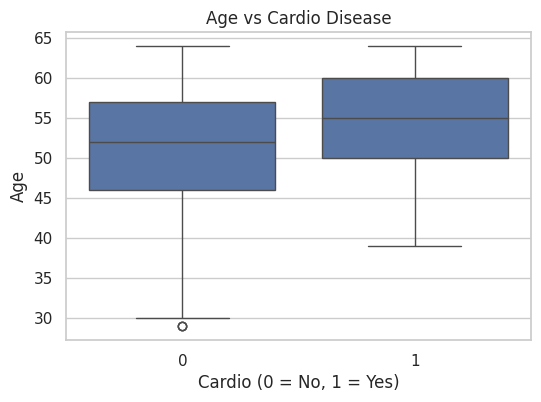

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='cardio', y='age_years', data=df)
plt.title("Age vs Cardio Disease")
plt.xlabel("Cardio (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

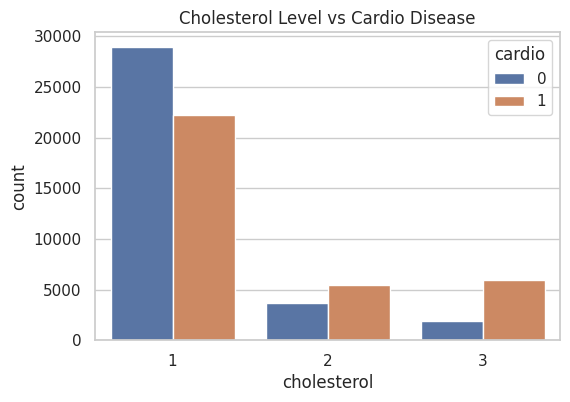

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='cholesterol', hue='cardio', data=df)
plt.title("Cholesterol Level vs Cardio Disease")
plt.show()


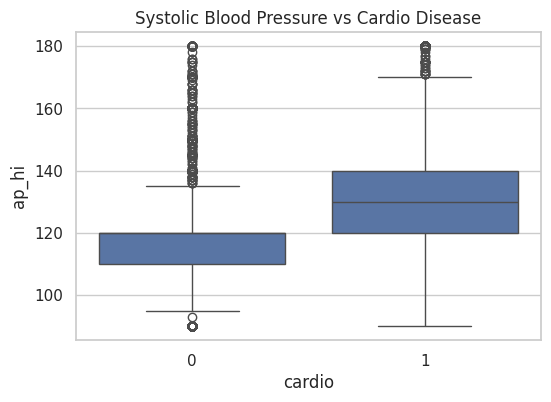

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='cardio', y='ap_hi', data=df)
plt.title("Systolic Blood Pressure vs Cardio Disease")
plt.show()


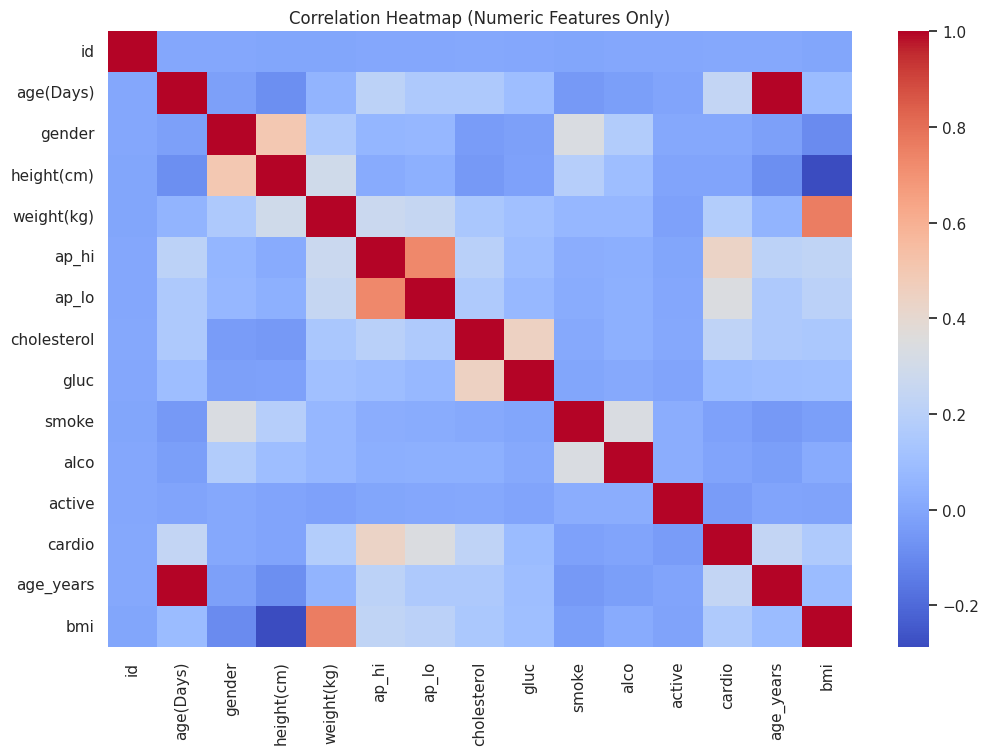

In [ ]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

In [ ]:
df.isnull().sum()

id                     0
age(Days)              0
gender                 0
height(cm)             0
weight(kg)             0
ap_hi                  0
ap_lo                  0
cholesterol            0
gluc                   0
smoke                  0
alco                   0
active                 0
cardio                 0
age_years              0
bmi                    0
bp_category            0
bp_category_encoded    0
dtype: int64

In [ ]:
X = df.drop('cardio', axis=1)
y = df['cardio']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
categorical_cols = X.select_dtypes(include='object').columns

print("Dropping categorical columns:", categorical_cols)

X = X.drop(columns=categorical_cols)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

Dropping categorical columns: Index(['bp_category', 'bp_category_encoded'], dtype='object')


In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

In [ ]:
mlp.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

In [ ]:
y_train_pred_mlp = mlp.predict(X_train_scaled)
y_test_pred_mlp = mlp.predict(X_test_scaled)

In [ ]:
print("Training Performance:")
print(classification_report(y_train, y_train_pred_mlp))

print("Testing Performance:")
print(classification_report(y_test, y_test_pred_mlp))

Training Performance:
              precision    recall  f1-score   support

           0       0.75      0.78      0.76     27626
           1       0.76      0.73      0.75     26938

    accuracy                           0.76     54564
   macro avg       0.76      0.76      0.76     54564
weighted avg       0.76      0.76      0.76     54564

Testing Performance:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73      6907
           1       0.73      0.69      0.71      6734

    accuracy                           0.72     13641
   macro avg       0.72      0.72      0.72     13641
weighted avg       0.72      0.72      0.72     13641



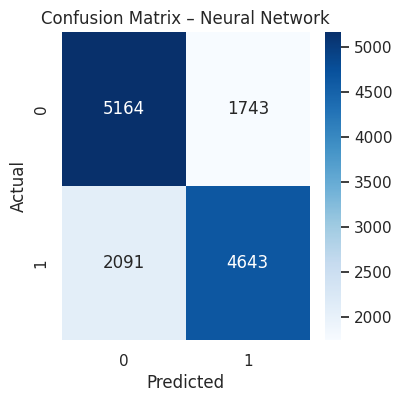

In [ ]:
cm = confusion_matrix(y_test, y_test_pred_mlp)

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Neural Network")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)

print("Logistic Regression Results")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Results
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6907
           1       0.76      0.66      0.71      6734

    accuracy                           0.73     13641
   macro avg       0.73      0.73      0.73     13641
weighted avg       0.73      0.73      0.73     13641



In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Results")
print(classification_report(y_test, y_pred_dt))

Decision Tree Results
              precision    recall  f1-score   support

           0       0.64      0.64      0.64      6907
           1       0.63      0.63      0.63      6734

    accuracy                           0.63     13641
   macro avg       0.63      0.63      0.63     13641
weighted avg       0.63      0.63      0.63     13641



In [ ]:
#accuracy comparison
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Logistic Regression Accuracy: 0.7294186643207976
Decision Tree Accuracy: 0.6315519390074041


In [ ]:
lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

grid_lr = GridSearchCV(
    LogisticRegression(max_iter=1000),
    lr_params,
    cv=5,
    scoring='f1'
)

grid_lr.fit(X_train_scaled, y_train)

print("Best Logistic Regression Params:", grid_lr.best_params_)
print("Best CV Score:", grid_lr.best_score_)

Best Logistic Regression Params: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV Score: 0.7057715079008602


In [ ]:
dt_params = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    dt_params,
    cv=5,
    scoring='f1'
)

grid_dt.fit(X_train, y_train)

print("Best Decision Tree Params:", grid_dt.best_params_)
print("Best CV Score:", grid_dt.best_score_)


Best Decision Tree Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV Score: 0.7062758474653089


In [ ]:
rfe = RFE(LogisticRegression(max_iter=1000), n_features_to_select=8)
rfe.fit(X_train_scaled, y_train)

selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['age(Days)', 'weight(kg)', 'ap_hi', 'ap_lo', 'cholesterol', 'alco',
       'active', 'age_years'],
      dtype='object')


In [ ]:
X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

scaler_final = StandardScaler()
X_train_sel_scaled = scaler_final.fit_transform(X_train_sel)
X_test_sel_scaled = scaler_final.transform(X_test_sel)

In [ ]:
final_lr = grid_lr.best_estimator_
final_lr.fit(X_train_sel_scaled, y_train)

y_final_lr = final_lr.predict(X_test_sel_scaled)

print("Final Logistic Regression")
print(classification_report(y_test, y_final_lr))

Final Logistic Regression
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6907
           1       0.76      0.67      0.71      6734

    accuracy                           0.73     13641
   macro avg       0.73      0.73      0.73     13641
weighted avg       0.73      0.73      0.73     13641



In [ ]:
final_dt = grid_dt.best_estimator_
final_dt.fit(X_train_sel, y_train)

y_final_dt = final_dt.predict(X_test_sel)

print("Final Decision Tree")
print(classification_report(y_test, y_final_dt))

Final Decision Tree
              precision    recall  f1-score   support

           0       0.71      0.77      0.74      6907
           1       0.74      0.68      0.71      6734

    accuracy                           0.73     13641
   macro avg       0.73      0.72      0.72     13641
weighted avg       0.73      0.73      0.72     13641



In [ ]:
final_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Accuracy': [
        accuracy_score(y_test, y_final_lr),
        accuracy_score(y_test, y_final_dt)
    ],
    'F1-Score': [
        f1_score(y_test, y_final_lr),
        f1_score(y_test, y_final_dt)
    ]
})

final_results

Model  Accuracy  F1-Score
0  Logistic Regression  0.730738  0.709667
1        Decision Tree  0.725533  0.710486